# Mean-Shift Clustering on Hypersphere

This repository contains a R script implements vMF mean shift clustering [1]. 

In [1]:
source("meanshift.R")

Loading required package: foreach
Loading required package: iterators
Loading required package: parallel


# Example: Unit Circle

In [2]:
set.seed(1)
N <- 500
M <- 8
radians <- sample(seq_len(M) / M * 2*pi, N, replace=TRUE) + rnorm(N)*0.1
X <- cbind(cos(radians), sin(radians))

In [3]:
# Choose parameters via optimizing Silhouette index.
result <- optimize_silhouette(X, k_seq=c(0.5,0.6,0.7,0.8,0.9),  max_iter=100, convergence_threshold=1e-5, merge_threshold=0.99)

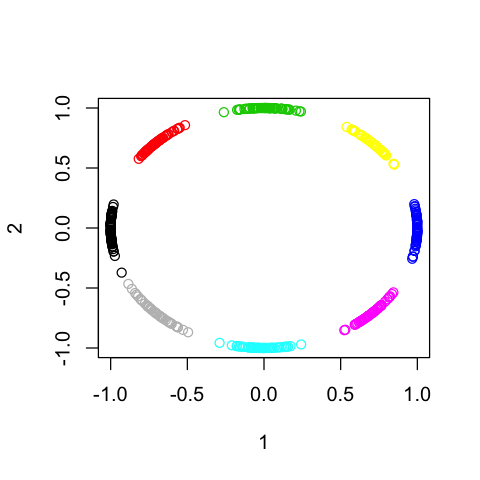

In [4]:
options(repr.plot.width=4, repr.plot.height=4)
plot(X, col=result$best$cluster_labels, xlab="1", ylab="2")

# Example: Unit Sphere

In [5]:
set.seed(3)
N <- 500
M <- 10
X0 <- l2_normalize(cbind(rnorm(M), rnorm(M), rnorm(M)))
X0 <- X0[sample(seq_len(M), N, replace=TRUE),]
radians_1 <- ifelse(X0[,1] > 0, 0, pi) + atan(X0[,2] / X0[,1]) + rnorm(N) * 0.1
radians_2 <- acos(X0[,3]) + rnorm(N) * 0.1
X <- cbind(
    cos(radians_1) * sin(radians_2),
    sin(radians_1) * sin(radians_2),
    cos(radians_2)
)

In [6]:
# Choose parameters via optimizing Silhouette index.
result <- optimize_silhouette(X, k_seq=seq(0.5, 0.99, 0.05),  max_iter=100, convergence_threshold=1e-5, merge_threshold=0.99)

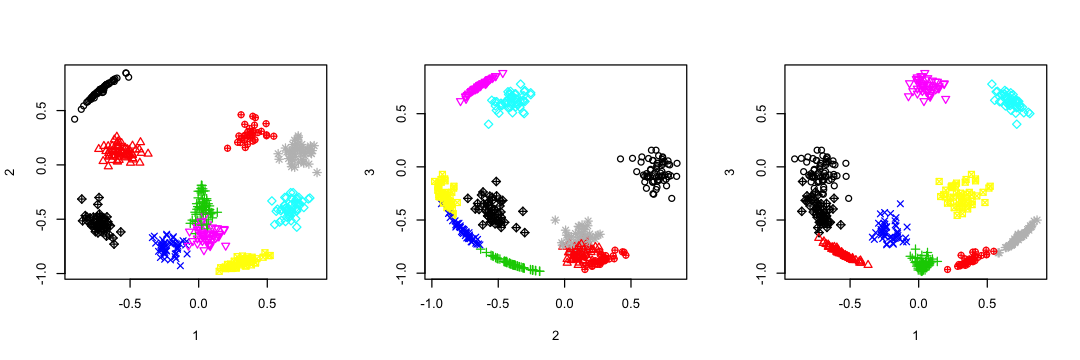

In [7]:
options(repr.plot.width=9, repr.plot.height=3)
par(mfrow=c(1,3))
plot(X[,c(1,2)], col=result$best$cluster_labels, pch=result$best$cluster_labels, xlab="1", ylab="2")
plot(X[,c(2,3)], col=result$best$cluster_labels, pch=result$best$cluster_labels, xlab="2", ylab="3")
plot(X[,c(1,3)], col=result$best$cluster_labels, pch=result$best$cluster_labels, xlab="1", ylab="3")

# Benchmark of Very High Dimension and Large Data

In [8]:
set.seed(1)
N <- 10000
M <- 300
X <- l2_normalize(matrix(rnorm(N*M), N, M))

In [9]:
system.time({
    result <- ms_sphere(X, max_iter=100, k=0.9, convergence_threshold=1e-5, merge_threshold=0.99, n_parallel = 8)
})

   user  system elapsed 
401.034  61.302 102.371 

# References

1. T. Kobayashi and N. Otsu, Von Mises-Fisher mean shift for clustering on a hypersphere, 2010, 